In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics
import pandas as pd

from fastai.imports import *
from fastai.structured import *

import matplotlib.pyplot as plt

In [3]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

### Leitura do csv e conversão em dataframe

In [ ]:
!ls

In [ ]:
df_beneficios = pd.read_csv('concedidos201812.csv',header=0, encoding='latin-1',sep=';')

### Exploração Inicial 

In [ ]:
df_beneficios.columns

In [ ]:
print(df_beneficios.dtypes)

In [ ]:
df_beneficios.head()

In [ ]:
display_all(df_beneficios.head().T)

In [ ]:
display_all(df_beneficios.describe( include='all' ).T)

In [ ]:
display_all(df_beneficios.isnull().sum().sort_index()/len(df_beneficios))
#Aparentemente nao tem nulls

In [ ]:
# Salva como feather 
df_beneficios.to_feather("df_beneficios.feather")

In [ ]:
!ls

## PreProcessamento 

In [4]:
df_raw = pd.read_feather('df_beneficios.feather')

In [5]:
display_all(df_raw.head().T)

,0,1,2,3,4
Competência concessão,201812,201812,201812,201812,201812
Espécie,Pensão por Morte Previdenciária,Auxílio Salario Maternidade,Aposentadoria por Tempo de Contribuição,Auxílio Salario Maternidade,Pensão por Morte Previdenciária
CID,Zerados,Zerados,Zerados,Zerados,Zerados
Despacho,Concessao Decorrente,Concessao Normal,Concessao com Conver,Concessao Normal,Concessao Normal
Dt Nascimento,22/06/2005,14/08/1994,09/12/1959,20/08/1981,04/01/1956
Clientela,Urbano,Rural,Urbano,Urbano,Urbano
Mun Resid,02043-AL-Maceió,03038-AM-São Paulo d,04307-BA-Simões Filh,04275-BA-Salvador,04007-BA-Alagoinhas
Vínculo dependentes,Filho,Filho,Não Informado,Filho,Cônjuge
Forma Filiação,Empregado,Segurado Especial,Autônomo,Facultativo,Autônomo
UF,Alagoas,Amazonas,Bahia,Bahia,Bahia


In [ ]:
## Transformando Data Nascimento em diversas colunas para exploração
#add_datepart(df_raw,'Dt Nascimento')

In [ ]:
df_raw.dtypes

In [ ]:
#df_raw['Espécie'] = df_raw['Espécie'].astype(str)

In [ ]:
#df_raw['Qt SM RMI'] = df_raw['Qt SM RMI'].str.replace(r'(',')', '.') ###ERRO 

In [ ]:
display_all(df_raw['Qt SM RMI'])

In [6]:
#Converte a virgula para ponto para poder converter de str para float
df_raw['Qt-SM'] = df_raw['Qt SM RMI'].str.replace(',' , '.' )
df_raw['Qt-SM'] = df_raw['Qt-SM'].astype(float)

In [7]:
df_raw['Qt-SM'].head()

0    4.326
1    1.000
2    1.586
3    1.000
4    1.000
Name: Qt-SM, dtype: float64

In [8]:
df_raw['Qt-SM'].describe()

count    339434.000000
mean          1.477993
std           0.994561
min           0.005000
25%           1.000000
50%           1.019000
75%           1.563000
max         262.599000
Name: Qt-SM, dtype: float64

In [9]:
df_raw.to_feather("df_raw.feather")

#### Importa o df_raw com os salrios convertidos para float

In [10]:
df_raw = pd.read_feather('df_raw.feather')

In [12]:
df_raw.columns

Index(['Competência concessão', 'Espécie', 'CID', 'Despacho', 'Dt Nascimento',
       'Clientela', 'Mun Resid', 'Vínculo dependentes', 'Forma Filiação', 'UF',
       'Qt SM RMI', 'Qt-SM'],
      dtype='object')

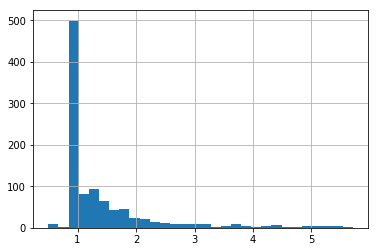

In [28]:
df_minimo = df_raw.sample(1000)
df_minimo['Qt-SM'].hist(bins=130)

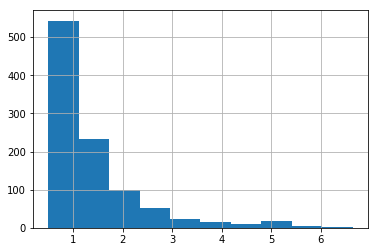

In [34]:
df_raw['Qt-SM'].hist(bins=10)